ZADANIE CENY AKCJI
-

1. Pobierz dane dotyczące cen akcji KGHM oraz cen miedzi.

In [33]:
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
from plotly import subplots as pltl
init_notebook_mode(connected=True)
import pandas as pd


In [34]:
kghm = pd.read_csv('kgh_d.csv')
kghm.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [35]:
copper = pd.read_csv('ca_c_f_d.csv')
copper.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


2. Stwórz dwa osobne wykresy liniowe (jeden pod drugim) – jeden niech przedstawia ceny zamknięcia KGHM, drugi niech przedstawia ceny miedzi (na podstawie kolumn "Zamknięcie").

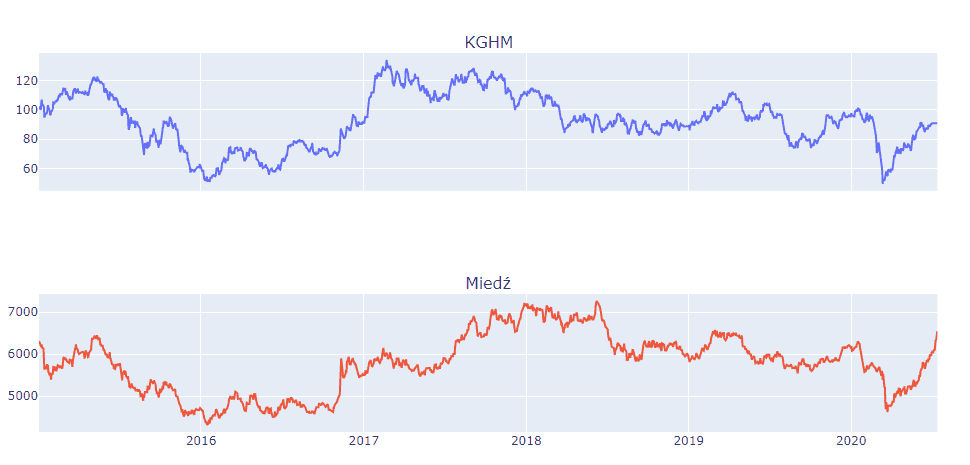


In [36]:
fig = pltl.make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    row_heights=[0.4, 0.4, 0.2],
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "table"}]]
)

In [37]:
#wykres KGHM
fig.add_trace(go.Scatter(
    x=kghm['Data'],
    y=kghm['Zamkniecie'],
    mode='lines',
    line=dict(color='blue', width=1),
    name='KGHM'
), row=1, col=1)

In [38]:
#wykres cen miedzi
fig.add_trace(go.Scatter(
    x=copper['Data'],
    y=copper['Zamkniecie'],
    mode='lines',
    line=dict(color='orange'),
    name='Miedź'
), row=2, col=1)

3. Jako trzeci element wykresu dodaj tabelę zestawiającą ceny zamknięcia KGHM oraz miedzi w kolejnych dniach (ponownie na podstawie kolumny "Zamknięcie").

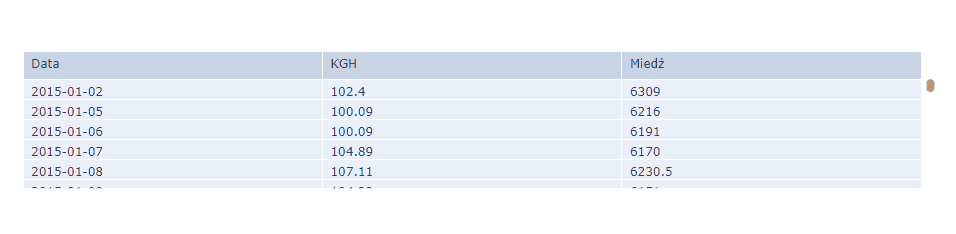

In [39]:
#tabela cen zamknięcia

merged = pd.merge(kghm[['Data', 'Zamkniecie']], copper[['Data', 'Zamkniecie']], on='Data', suffixes=('_KGHM', '_Miedź'))

fig.add_trace(go.Table(
    header=dict(values=["Data", "KGHM", "Miedź"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[merged['Data'], merged['Zamkniecie_KGHM'], merged['Zamkniecie_Miedź']],
               fill_color='lavender',
               align='left'))
, row=3, col=1)

4. Wykresowi nadaj odpowiednie tytuły, zadbaj, aby wykresy miały wspólną oś x.

In [42]:
#wykres ceny zamknięcia kghm z uwzględnieniem cen miedzi
fig.update_layout(
    height=750,
    title_text="Ceny zamknięcia: KGHM vs Miedź",
    showlegend=False,
    plot_bgcolor='lavender',
    paper_bgcolor='white',
    font=dict(size=12),
)

fig.update_xaxes(
    showline=False,
    showgrid=True, gridcolor='white',
    dtick="M12",
    tickformat="%Y",
    row=2, col=1
)

fig.update_yaxes(
    showline=False,
    showgrid=True, gridcolor='white',
    dtick=1000,
    row=2, col=1
)

fig.update_layout(
    annotations=[
        dict(
            text="KGHM",
            x=0.5,
            y=1.032,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=18)
        ),
        dict(
            text="Miedź",
            x=0.5,
            y=0.595,
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=18)
        )
    ]
)

iplot(fig)